### Breast Cancer Classification

#### Necessary imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest,chi2

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.csv', header = None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


#### Attribute Information: 
   1. Sample code number -           id number
   2. Clump Thickness   -            1 - 10
   3. Uniformity of Cell Size -      1 - 10
   4. Uniformity of Cell Shape -     1 - 10
   5. Marginal Adhesion -             1 - 10
   6. Single Epithelial Cell Size -   1 - 10
   7. Bare Nuclei -                  1 - 10
   8. Bland Chromatin  -             1 - 10
   9. Normal Nucleoli -              1 - 10
  10. Mitoses -                      1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

In [4]:
df.shape

(699, 11)

The dataset has 699 rows and 11 columns.

#### Data Cleaning

#### Replace records having ? with NaN values.

In [8]:
df = df.replace('?',np.NaN)

In [11]:
df[6] = df[6].fillna(method='bfill')

In [13]:
df.head(30)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [14]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [15]:
#Look at the data types 
df.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
5      int64
6     object
7      int64
8      int64
9      int64
10     int64
dtype: object

### Exploratory Data Analysis

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='10', ylabel='count'>

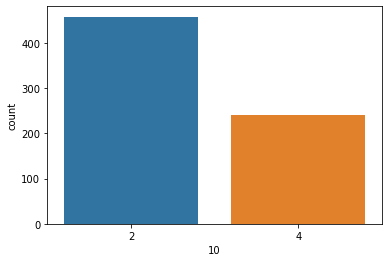

In [17]:
#Visualize this count 
sns.countplot(df[10],label="Count")

In [20]:
# y includes our labels and x includes our features
y = df[10]                          # M=4 or B=2
list = [0,10]
X = df.drop(list,axis = 1 )
X.head()

,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [21]:
X.describe()

,1,2,3,4,5,7,8,9
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [22]:
X.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

#### Feature Scaling and Selection

In [25]:
# Define a scaler function
def scaler(df):
    """The Function receive a Dataframe and return a Scaled Dataframe"""
    scaler = preprocessing.MinMaxScaler()
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    
    return scaled_df

# testing scaler
scaled_df = scaler(X)

scaled_df.head()

,1,2,3,4,5,6,7,8,9
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


#### Detect outliers using Tukey method

In [26]:
# Define a function to detect outliers
def remove_outliers(X, y, f=2, distance=1.5):
    
    """The Function receive Features (X) and Label (y) a frequency (f) and Inter-Quartile distance (distance),  
    and return features and labels without outliers (good_X, good_y)"""
    
    outliers  = []

    # For each feature find the data points with extreme high or low values
    for feature in X.keys():

        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(X[feature], 25)

        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(X[feature], 75)

        # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = (Q3 - Q1) * distance

        outliers.append(X[~((X[feature] >= Q1 - step) & (X[feature] <= Q3 + step))].index.values)

    # Select the indices for data points you wish to remove
    flat_list = [item for sublist in outliers for item in sublist]

    # importing Counter
    from collections import Counter
    
    freq = Counter(flat_list)
    # Create a list to store outliers to remove
    outliers_to_remove = []
    
    for key, value in freq.items():
        if value > f:
            outliers_to_remove.append(key)

    # Remove the outliers, if any were specified
    good_X = X.drop(X.index[outliers_to_remove]).reset_index(drop = True)
    good_y    = y.drop(y.index[outliers_to_remove]).reset_index(drop = True)
    # Sort list
    outliers_to_remove.sort()
    # Print outliers founded
    for i in range(len(outliers_to_remove)):
        print( "data point: ", outliers_to_remove[i], "is considered outlier to more than ", f, " feature" )

    print( "All ", len(outliers_to_remove), "were removed!" )
    # return data without outliers
    return good_X, good_y 


good_X, good_y = remove_outliers(scaled_df, y, f=2, distance=1.5)

data point:  84 is considered outlier to more than  2  feature
data point:  85 is considered outlier to more than  2  feature
data point:  98 is considered outlier to more than  2  feature
data point:  99 is considered outlier to more than  2  feature
data point:  100 is considered outlier to more than  2  feature
data point:  104 is considered outlier to more than  2  feature
data point:  132 is considered outlier to more than  2  feature
data point:  166 is considered outlier to more than  2  feature
data point:  173 is considered outlier to more than  2  feature
data point:  177 is considered outlier to more than  2  feature
data point:  191 is considered outlier to more than  2  feature
data point:  205 is considered outlier to more than  2  feature
data point:  210 is considered outlier to more than  2  feature
data point:  213 is considered outlier to more than  2  feature
data point:  261 is considered outlier to more than  2  feature
data point:  264 is considered outlier to mo

In [27]:
good_X.head()

,1,2,3,4,5,6,7,8,9
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='10', ylabel='count'>

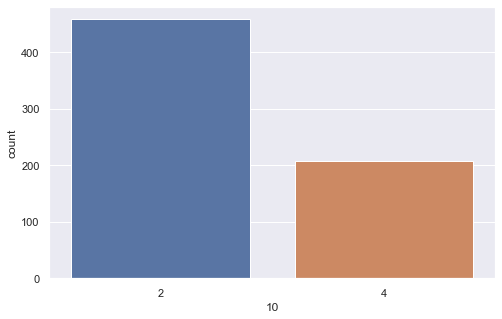

In [28]:
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(good_y)

#### train test split the dataset

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(good_X, good_y, random_state=100, test_size=0.3)
print(X_train.shape)

(465, 9)


#### Cross Validation using StratifiedKFold

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [32]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('RF',  RandomForestClassifier(n_estimators=100)))

In [33]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred_cross = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_cross))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name  Score
0  KNN  0.945
1   DT  0.930
2   RF  0.960


In [34]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, good_X, good_y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.966915
1   DT  0.933899
2   RF  0.963908


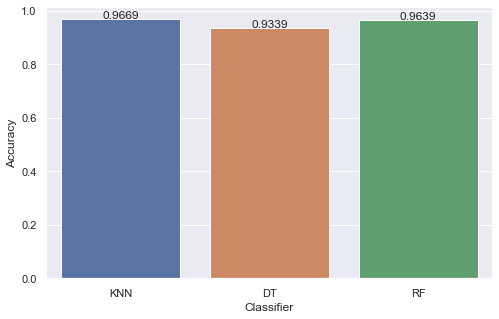

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

It seems to be that KNN is the best approach using StratifiedKFold method.